In [8]:
from utility import *
import numpy as np
import keras
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from keras.models import model_from_json
import matplotlib.pyplot as plt

# import demo testset

In [2]:
data_test = np.load('images_test.npy')
label_test = np.load("labels_test.npy")

## convert label (1/2) to one hot code

In [3]:
label_test_one_hot = label_to_one_hot(label_test)

## reshape image arrays to N x size x size x 3

In [4]:
data_test = data_test.reshape((data_test.shape[0], 100, 100, 3))

## normalize image arrays to 0 - 1 

In [5]:
data_test = normalize_data(data_test)

# Display images from test set


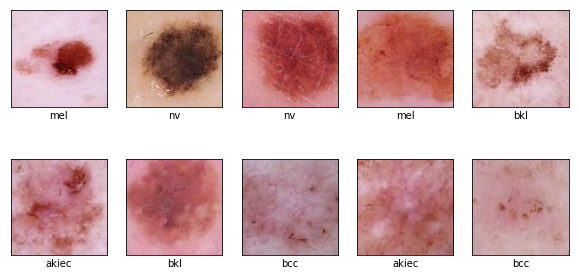

In [15]:
classes = {1: 'nv', 2: 'mel', 3: 'bkl', 4: 'bcc', 5: 'akiec'}

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)

    plt.imshow(data_test[i])

    plt.xlabel(classes[int(label_test[i])])
    plt.xticks([])
    plt.yticks([])

# import VGG-13 model and parameters

In [17]:
json_file = open('vgg13_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
VGG13_loaded_model = model_from_json(loaded_model_json)
# load weights into new model
VGG13_loaded_model.load_weights("vgg13_model.h5")
print("Loaded model from disk")
 
def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

# evaluate loaded model on test data
VGG13_loaded_model.compile(optimizer='AdaDelta', loss='categorical_crossentropy', metrics=['accuracy', top_2_accuracy])

Loaded model from disk


## evaluate model on test set

In [19]:
score, acc, top2 = VGG13_loaded_model.evaluate(data_test, label_test_one_hot)
print('Test score:', score)
print('Test accuracy:', acc)
print('Top-2 accuracy:', top2)

10/10 [==============================] - 2s 234ms/step
('Test score:', 1.8622493743896484)
('Test accuracy:', 0.699999988079071)
('Top-2 accuracy:', 0.800000011920929)
